# Desafío 1
## Equipo Luciana Sonnet - Micaela Kim - Dino Ronconi

In [68]:
# Ejecutar esta celda solamente la primera vez, cuando importamos la NB a nuestro ambiente
!pip install geopandas
!pip install matplotlib
!pip install descartes
!pip install folium
!conda install -y rtree 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.8
  latest version: 4.6.10

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [ ]:
import numpy as np
import pandas as pd

In [81]:
properatti = pd.read_csv("properatti.csv")

## Exploración del dataframe
### Un primer vistazo a los datos

In [82]:
properatti.head(30)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


In [83]:
properatti.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

### Borramos dos columnas que consideramos inútiles para estos análisis

In [84]:
#Creemos que operation y country_name tienen valores únicos, lo cual puede resultar redundante para nuestro análisis
properatti["country_name"].unique()

array(['Argentina'], dtype=object)

In [85]:
properatti["operation"].unique()

array(['sell'], dtype=object)

In [86]:
#Eliminamos los valores redundantes para nuestro análisis:
#Country_name y Operation que lo demostramos antes
#ELiminamos también image_thumbnail y properati_url porque no son relevante para nuestro análisis
#Eliminamos Unnamed: 0 porque es una columna que duplica el indice que ya tenemos

properatti.drop(['image_thumbnail', 'properati_url','operation','country_name',"Unnamed: 0"], axis=1, inplace=True)

In [87]:
properatti.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title'],
      dtype='object')

In [88]:
properatti.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


### Cambiamos los identificadores de las columnas por textos más intuitivos

In [89]:
 properatti.columns = ['tipo_prop', 'barrio',
       'lugar_completo', 'provincia', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'precio', 'moneda',
       'precio_moneda_local', 'precio_dolares', 'superficie',
       'superficie_cubierta', 'precio_x_m2_dolares', 'precio_x_m2','pisos',
       'ambientes', 'expensas', 'descripcion', 'titulo']

In [90]:
properatti.columns

Index(['tipo_prop', 'barrio', 'lugar_completo', 'provincia', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'precio', 'moneda', 'precio_moneda_local',
       'precio_dolares', 'superficie', 'superficie_cubierta',
       'precio_x_m2_dolares', 'precio_x_m2', 'pisos', 'ambientes', 'expensas',
       'descripcion', 'titulo'],
      dtype='object')

In [91]:
properatti.head()

,tipo_prop,barrio,lugar_completo,provincia,geonames_id,lat-lon,lat,lon,precio,moneda,...,precio_dolares,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2,pisos,ambientes,expensas,descripcion,titulo
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [92]:
properatti["tipo_prop"].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

## Completando las columnas con valores nulos

### Vemos la cantidad de valores nulos que tenemos en el dataset por columna

In [93]:
properatti.isna().sum()

tipo_prop                   0
barrio                     23
lugar_completo              0
provincia                   0
geonames_id             18717
lat-lon                 51550
lat                     51550
lon                     51550
precio                  20410
moneda                  20411
precio_moneda_local     20410
precio_dolares          20410
superficie              39328
superficie_cubierta     19907
precio_x_m2_dolares     52603
precio_x_m2             33562
pisos                  113321
ambientes               73830
expensas               106958
descripcion                 2
titulo                      0
dtype: int64

In [94]:
#Vemos el porcentaje de valores completos que tenemos por columna
properatti.isna().sum()/121220*100

tipo_prop               0.000000
barrio                  0.018974
lugar_completo          0.000000
provincia               0.000000
geonames_id            15.440521
lat-lon                42.525986
lat                    42.525986
lon                    42.525986
precio                 16.837156
moneda                 16.837981
precio_moneda_local    16.837156
precio_dolares         16.837156
superficie             32.443491
superficie_cubierta    16.422208
precio_x_m2_dolares    43.394654
precio_x_m2            27.686850
pisos                  93.483749
ambientes              60.905791
expensas               88.234615
descripcion             0.001650
titulo                  0.000000
dtype: float64

### Vemos que tenemos valores nulos en "barrios". Vemos si podemos completarlos

In [95]:
properatti[properatti["barrio"].isna()].head()

,tipo_prop,barrio,lugar_completo,provincia,geonames_id,lat-lon,lat,lon,precio,moneda,...,precio_dolares,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2,pisos,ambientes,expensas,descripcion,titulo
6489,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,650000.0,USD,...,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,NaN,NaN,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre
10201,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,535000.0,USD,...,535000.0,NaN,300.0,NaN,1783.333333,NaN,5.0,NaN,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...
11451,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261,550000.0,USD,...,550000.0,2170.0,270.0,253.456221,2037.037037,NaN,NaN,NaN,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE
14839,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174,480000.0,USD,...,480000.0,240.0,200.0,2000.000000,2400.000000,NaN,NaN,NaN,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre
18622,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350,1297000.0,USD,...,1297000.0,340.0,340.0,3814.705882,3814.705882,NaN,NaN,NaN,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...


#### Vemos que los faltantes son todos de Tigre, entonces los actualizamos directamente y comprobamos el resultado

In [96]:
properatti['barrio'].fillna('Tigre', inplace=True)
properatti.isna().sum()

tipo_prop                   0
barrio                      0
lugar_completo              0
provincia                   0
geonames_id             18717
lat-lon                 51550
lat                     51550
lon                     51550
precio                  20410
moneda                  20411
precio_moneda_local     20410
precio_dolares          20410
superficie              39328
superficie_cubierta     19907
precio_x_m2_dolares     52603
precio_x_m2             33562
pisos                  113321
ambientes               73830
expensas               106958
descripcion                 2
titulo                      0
dtype: int64

Creamos un data frame auxiliar con las columnas relacionadas al precio

In [97]:
properatti_aux = properatti[['precio', 'moneda',
       'precio_moneda_local', 'precio_dolares', 'superficie',
       'superficie_cubierta', 'precio_x_m2_dolares', 'precio_x_m2']]

In [98]:
#Agregamos 2 columnas:
#Una columna que me verifique si la superficie y superficie cubierta es la misma
#Otra columna que me calcule el tipo de cambio (solamente cuando la superficie y superficie cubierta es la misma)
properatti["diferencia_superficie"] = properatti_aux["superficie"]/ properatti_aux["superficie_cubierta"]
properatti["tipo_cambio"] = properatti_aux["precio_x_m2"] / properatti_aux["precio_x_m2_dolares"][properatti["diferencia_superficie"]==1]


Agregamos estas dos nuevas columnas al data frame auxiliar

In [99]:
properatti_aux = properatti[['precio', 'moneda',
       'precio_moneda_local', 'precio_dolares', 'superficie',
       'superficie_cubierta', 'precio_x_m2_dolares', 'precio_x_m2', "diferencia_superficie","tipo_cambio"]]
properatti_aux.head(30)

,precio,moneda,precio_moneda_local,precio_dolares,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2,diferencia_superficie,tipo_cambio
0,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,1.375000,NaN
1,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN
2,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,1.000000,1.0
3,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN
4,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,1.000000,1.0
5,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN
6,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,1.358974,NaN
7,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,1.125000,NaN
8,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,1.083333,NaN
9,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN


#### Vemos los elementos dentro de la columna "moneda"

In [100]:
properatti_aux['moneda'].unique() 

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [101]:
properatti_aux[['moneda',"precio"]].groupby('moneda').count().sort_values('moneda',ascending = True)

,precio
moneda,
ARS,13219
PEN,2
USD,87587
UYU,1


In [102]:
properatti_argentinos = properatti_aux.loc[properatti_aux["moneda"] == "ARS"].sort_values(by = "tipo_cambio", ascending = False)
properatti_argentinos

,precio,moneda,precio_moneda_local,precio_dolares,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2,diferencia_superficie,tipo_cambio
58825,114000.0,ARS,112810.64,6393.53,51.0,51.0,125.363333,2235.294118,1.0,17.830526
18705,100000.0,ARS,98956.70,5608.36,81.0,81.0,69.239012,1234.567901,1.0,17.830524
63543,100000.0,ARS,98956.70,5608.36,58.0,58.0,96.695862,1724.137931,1.0,17.830524
41846,100000.0,ARS,98956.70,5608.36,75.0,75.0,74.778133,1333.333333,1.0,17.830524
41946,125000.0,ARS,123695.88,7010.45,50.0,50.0,140.209000,2500.000000,1.0,17.830524
58958,125000.0,ARS,123695.88,7010.45,65.0,65.0,107.853077,1923.076923,1.0,17.830524
51602,97000.0,ARS,95988.02,5440.11,45.0,45.0,120.891333,2155.555556,1.0,17.830522
55108,130000.0,ARS,128643.75,7290.87,80.0,80.0,91.135875,1625.000000,1.0,17.830520
32900,130000.0,ARS,128643.75,7290.87,45.0,45.0,162.019333,2888.888889,1.0,17.830520
41843,130000.0,ARS,128643.75,7290.87,53.0,53.0,137.563585,2452.830189,1.0,17.830520


In [103]:
#Veo si estoy tomando la diferencia_superficie = 1 solamente
properatti_argentinos["diferencia_superficie"].describe()

count    7557.000000
mean        2.026610
std        25.582847
min         0.011183
25%         1.000000
50%         1.127660
75%         1.288462
max      1337.500000
Name: diferencia_superficie, dtype: float64

In [104]:
properatti_argentinos[properatti_argentinos.precio_x_m2_dolares.isna()]

,precio,moneda,precio_moneda_local,precio_dolares,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2,diferencia_superficie,tipo_cambio
9,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,NaN
97,1423800.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN,NaN,NaN
154,1200000.0,ARS,1187482.08,67300.41,NaN,40.0,NaN,30000.000000,NaN,NaN
174,1473950.0,ARS,1458574.29,82664.53,NaN,57.0,NaN,25858.771930,NaN,NaN
309,1500000.0,ARS,1484352.56,84125.51,NaN,41.0,NaN,36585.365854,NaN,NaN
331,2550000.0,ARS,2523399.40,143013.37,NaN,95.0,NaN,26842.105263,NaN,NaN
447,1400000.0,ARS,1385395.67,78517.14,NaN,60.0,NaN,23333.333333,NaN,NaN
451,895000.0,ARS,885663.73,50194.89,NaN,55.0,NaN,16272.727273,NaN,NaN
453,1100000.0,ARS,1088525.19,61692.04,NaN,100.0,NaN,11000.000000,NaN,NaN
454,1500000.0,ARS,1484352.56,84125.51,NaN,53.0,NaN,28301.886792,NaN,NaN


In [105]:
properatti_argentinos["tipo_cambio"].describe()

count    2093.000000
mean       17.822131
std         0.072486
min        17.143000
25%        17.830501
50%        17.830501
75%        17.830502
max        17.830526
Name: tipo_cambio, dtype: float64

In [106]:
#Vemos cuál es la media del tipo de cambio
media_tipo_cambio = properatti_argentinos["tipo_cambio"].mean()
media_tipo_cambio

17.822130709269338

In [107]:
## establecemos correlaciones entre campos
corr = properatti.corr()
corr.sort_values(["precio"],ascending = True)
corr

,geonames_id,lat,lon,precio,precio_moneda_local,precio_dolares,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2,pisos,ambientes,expensas,diferencia_superficie,tipo_cambio
geonames_id,1.000000,0.166446,-0.293347,0.037997,-0.041616,-0.041616,2.350088e-04,-0.005824,-0.041274,0.056873,-0.025147,0.063870,-2.736558e-03,0.005796,0.176434
lat,0.166446,1.000000,-0.294338,0.174643,0.067063,0.067063,9.125336e-03,0.008079,0.050212,0.086109,-0.040754,0.098654,4.695984e-03,0.011269,0.295365
lon,-0.293347,-0.294338,1.000000,-0.187412,-0.026092,-0.026092,-4.066232e-02,-0.009536,0.038563,-0.087840,0.059644,-0.161893,-2.613714e-03,-0.018948,-0.418092
precio,0.037997,0.174643,-0.187412,1.000000,0.329037,0.329037,1.134865e-01,0.047523,0.111961,0.501541,-0.009257,0.128777,8.051121e-03,0.004891,0.591390
precio_moneda_local,-0.041616,0.067063,-0.026092,0.329037,1.000000,1.000000,3.011366e-01,0.165531,0.311328,0.056121,-0.003029,0.182916,1.100998e-02,0.003752,-0.148589
precio_dolares,-0.041616,0.067063,-0.026092,0.329037,1.000000,1.000000,3.011366e-01,0.165531,0.311328,0.056121,-0.003029,0.182916,1.100998e-02,0.003752,-0.148589
superficie,0.000235,0.009125,-0.040662,0.113487,0.301137,0.301137,1.000000e+00,0.195453,-0.047708,-0.021952,0.013522,0.106810,7.945656e-07,0.288908,-0.061185
superficie_cubierta,-0.005824,0.008079,-0.009536,0.047523,0.165531,0.165531,1.954531e-01,1.000000,-0.050408,-0.020582,-0.000677,0.162912,7.976653e-04,-0.002303,-0.061185
precio_x_m2_dolares,-0.041274,0.050212,0.038563,0.111961,0.311328,0.311328,-4.770796e-02,-0.050408,1.000000,0.177082,0.158965,-0.173599,1.662794e-02,-0.029066,-0.090591
precio_x_m2,0.056873,0.086109,-0.087840,0.501541,0.056121,0.056121,-2.195167e-02,-0.020582,0.177082,1.000000,-0.019437,-0.049194,-2.432707e-03,0.124937,0.766966


#### Veo el precio promedio por barrio

In [108]:
## hacemos un primer groupby por precio metro cuadrado para cada barrio
properatti.groupby('barrio')['precio_x_m2'].mean().head(5)

barrio
 Country Maschwitz Club    1303.311966
 los alamos                1990.243902
9 de Abril                  539.772727
Abasto                     2517.798880
Abril Club de Campo        1960.679121
Name: precio_x_m2, dtype: float64

In [109]:
## vemos los precios promedio por metro cuadrado diferenciado por tipo de propiedad para cada barrio
pd.crosstab(properatti['barrio'],properatti['tipo_prop'],values=properatti['precio_x_m2_dolares'],aggfunc=np.mean,normalize=False)

tipo_prop,PH,apartment,house,store
barrio,,,,
Country Maschwitz Club,NaN,NaN,1369.986720,NaN
los alamos,NaN,1600.000000,NaN,NaN
9 de Abril,NaN,NaN,94.017094,181.818182
Abasto,1570.485350,2187.314606,1432.703521,2080.293122
Abril Club de Campo,NaN,NaN,1207.867133,NaN
Acacias Blancas,NaN,NaN,1181.861023,NaN
Acassuso,1990.304342,2799.079776,1596.352365,2400.210600
Adrogué,1598.763964,2390.702109,1579.838145,1998.014870
Aeropuerto Internacional Ezeiza,NaN,NaN,943.396226,NaN


In [110]:
## vemos los precios promedio por metro cuadrado diferenciado por tipo de propiedad para cada provincia
pd.crosstab(properatti['provincia'],properatti['tipo_prop'],values=properatti['precio_x_m2_dolares'],aggfunc=np.mean,normalize=False)

tipo_prop,PH,apartment,house,store
provincia,,,,
Bs.As. G.B.A. Zona Norte,1451.712566,2539.871735,1339.764409,1862.009755
Bs.As. G.B.A. Zona Oeste,1224.018825,1720.754481,1081.629587,1556.947316
Bs.As. G.B.A. Zona Sur,1114.012013,1889.978782,1164.503788,1541.024184
Buenos Aires Costa Atlántica,1156.454370,1958.838430,749.149782,1401.045662
Buenos Aires Interior,1019.888682,1633.999387,643.236465,987.670901
Capital Federal,1695.517729,3324.464870,1546.701574,2899.667204
Catamarca,NaN,NaN,556.045469,NaN
Chaco,NaN,1424.743536,701.166824,1509.551047
Chubut,NaN,2002.694843,1739.270312,1323.758082


In [111]:
## observamos los precios promedio por metro cuadrado en dólares y la superficie cubierta promedio para cada
## provincia y barrio
columnas_mostrar = properatti[['provincia','barrio','tipo_prop','superficie_cubierta','precio_x_m2_dolares']]
properatti.groupby(['provincia','barrio'])
groupby_provincia_barrio = columnas_mostrar.groupby(['provincia','barrio']).mean().sort_values(['provincia','barrio'])
groupby_provincia_barrio

superficie_cubierta  \
provincia                barrio                                                       
Bs.As. G.B.A. Zona Norte  Country Maschwitz Club                         241.666667   
                          los alamos                                      41.000000   
                         Acacias Blancas                                 210.212121   
                         Acassuso                                        280.656522   
                         Albanueva Barrio Cerrado                        234.038462   
                         Altamira                                        254.857143   
                         Altos de Manzanares 1 y 2                       225.500000   
                         Altos de Matheu                                 150.000000   
                         Altos del Golf                                  151.000000   
                         Altos del Pilar                                 457.181818   
                         Armenia Country Club                            158.600000   
                         Bahía del Sol                                   473.750000   
                         Barbarita, Barrio Cerrado                       248.900000   
                         Barrancas de San Jose                           213.307692   
                         Barrancas de Santa María                        184.833333   
                         Barrio Acacias                                  184.666667   
                         Barrio Alamo Alto                               135.000000   
                         Barrio Araucarias                               199.750000   
                         Barrio Barrancas del Lago                              NaN   
                         Barrio Cabos del Lago                           255.666667   
                         Barrio Ceibos                                   226.500000   
                         Barrio Cerrado                                  380.500000   
                         Barrio Cerrado "Ayres Plaza"                    209.500000   
                         Barrio Cerrado "Buenos Aires Village"           178.500000   
                         Barrio Cerrado "El Aromo"                       164.000000   
                         Barrio Cerrado "El Estribo"                     235.000000   
                         Barrio Cerrado "Isla del Sol"                   182.000000   
                         Barrio Cerrado "La Candelaria"                  217.000000   
                         Barrio Cerrado "La Cautiva del Pilar"            72.000000   
                         Barrio Cerrado "La Cañada de Pilar"             167.333333   
...                                                                             ...   
Santa Fe                 San Justo                                       120.000000   
                         San Lorenzo                                     120.587629   
                         Santa Fe                                        122.320113   
                         Santa Rosa de Calchines                                NaN   
                         Santa Teresa                                           NaN   
                         Santo Tomé                                       82.046512   
                         Sarmiento                                              NaN   
                         Sauce Viejo                                     154.250000   
                         Serodino                                               NaN   
                         Sunchales                                       108.000000   
                         Susana                                                 NaN   
                         Timbúes                                          58.000000   
                         Venado Tuerto                                   506.000000   
                         Villa Constitución                   

In [112]:
#### Sabemos que el tipo de cambio es de 17.830506
#### Queremos completar cuando sea posible los valores faltantes de "precio_x_m2_dolares" y "precio_x_m2"

In [113]:
properatti_argentinos_aux = properatti_argentinos[["precio_x_m2_dolares","precio_x_m2"]]
properatti_argentinos_aux[pd.isnull(properatti_argentinos_aux).any(axis=1)]

,precio_x_m2_dolares,precio_x_m2
9,NaN,NaN
97,NaN,NaN
154,NaN,30000.000000
168,719.021487,NaN
174,NaN,25858.771930
309,NaN,36585.365854
331,NaN,26842.105263
424,2005.564651,NaN
447,NaN,23333.333333
451,NaN,16272.727273


In [114]:
#Le agregamos la columna de "diferencia_superficie"
properatti_argentinos_aux["diferencia_superficie"] = properatti_argentinos["diferencia_superficie"]
properatti_argentinos_aux.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,precio_x_m2_dolares,precio_x_m2,diferencia_superficie
58825,125.363333,2235.294118,1.0
18705,69.239012,1234.567901,1.0
63543,96.695862,1724.137931,1.0
41846,74.778133,1333.333333,1.0
41946,140.209000,2500.000000,1.0


In [115]:
properatti_argentinos_aux[properatti_argentinos_aux.precio_x_m2.isna()]

,precio_x_m2_dolares,precio_x_m2,diferencia_superficie
9,NaN,NaN,NaN
97,NaN,NaN,NaN
168,719.021487,NaN,NaN
424,2005.564651,NaN,NaN
471,1292.507105,NaN,NaN
472,1326.235128,NaN,NaN
473,1264.431818,NaN,NaN
494,1589.037333,NaN,NaN
561,NaN,NaN,NaN
562,NaN,NaN,NaN


In [116]:
properatti_argentinos_aux[properatti_argentinos_aux.diferencia_superficie == 1]

,precio_x_m2_dolares,precio_x_m2,diferencia_superficie
58825,125.363333,2235.294118,1.0
18705,69.239012,1234.567901,1.0
63543,96.695862,1724.137931,1.0
41846,74.778133,1333.333333,1.0
41946,140.209000,2500.000000,1.0
58958,107.853077,1923.076923,1.0
51602,120.891333,2155.555556,1.0
55108,91.135875,1625.000000,1.0
32900,162.019333,2888.888889,1.0
41843,137.563585,2452.830189,1.0


In [117]:
properatti_argentinos_aux[pd.isnull(properatti_argentinos_aux).any(axis=1)].head()

,precio_x_m2_dolares,precio_x_m2,diferencia_superficie
9,NaN,NaN,NaN
97,NaN,NaN,NaN
154,NaN,30000.00000,NaN
168,719.021487,NaN,NaN
174,NaN,25858.77193,NaN


In [118]:
#Realizamos el reemplazo solamente para los que tenemos la misma superficie y superficie cubierta

#Completamos primero la columna de "precios_x_m2_dolares"
#properatti_argentinos_aux.fillna({"precio_x_m2_dolares":(properatti_argentinos_aux["precio_x_m2"]/ media_tipo_cambio)})[(properatti_argentinos_aux.diferencia_superficie ==1) & (properatti_argentinos_aux.precio_x_m2_dolares.isna())]



In [119]:
properatti_aux2 = properatti_aux[["superficie","superficie_cubierta","precio_x_m2_dolares","precio_x_m2"]]
properatti_aux2.head()

,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2
0,55.0,40.0,1127.272727,1550.000000
1,NaN,NaN,NaN,NaN
2,55.0,55.0,1309.090909,1309.090909
3,NaN,NaN,NaN,NaN
4,35.0,35.0,1828.571429,1828.571429


In [120]:
#### Tomamos solo los que son nulos para reemplazar por la media por barrio
properatti_aux_nulos = properatti_aux2[(properatti_aux2["superficie"].isna()) & (properatti_aux2["precio_x_m2_dolares"].isna()) & (properatti_aux2["superficie_cubierta"].isna()) & (properatti_aux2["precio_x_m2"].isna())]
properatti_aux_nulos.head()

,superficie,superficie_cubierta,precio_x_m2_dolares,precio_x_m2
1,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN


In [121]:
properatti_subdf2 = properatti[["precio_dolares","precio_x_m2","superficie_cubierta"]]
properatti_subdf2.head(100)

,precio_dolares,precio_x_m2,superficie_cubierta
0,62000.00,1550.000000,40.0
1,150000.00,NaN,NaN
2,72000.00,1309.090909,55.0
3,95000.00,NaN,NaN
4,64000.00,1828.571429,35.0
5,NaN,NaN,NaN
6,130000.00,1666.666667,78.0
7,138000.00,3450.000000,40.0
8,195000.00,3250.000000,60.0
9,25798.49,NaN,NaN


In [122]:
properatti_aux.isna().sum()

precio                    20410
moneda                    20411
precio_moneda_local       20410
precio_dolares            20410
superficie                39328
superficie_cubierta       19907
precio_x_m2_dolares       52603
precio_x_m2               33562
diferencia_superficie     46866
tipo_cambio              100727
dtype: int64

In [123]:
def reemplaza_precios(registro, precio_prom, cotiz_dolar):
    if np.isnan(registro.precio_x_m2_dolares) and np.isnan(registro.superficie_cubierta) and np.isnan(registro.precio_x_m2):
        # no tengo precioM2 dolares, ni precioM2, ni superficie (no puedo calcular el precio) PONGO el precio promedio
        registro.precio_x_m2_dolares = precio_prom      
    elif not np.isnan(registro.precio_dolares) and not np.isnan(registro.superficie_cubierta):
        # tengo el precio en dólares y la superficie entonces calculo el precioM2 dolares
        registro.precio_x_m2_dolares = registro.precio_dolares / registro.superficie_cubierta
    elif not np.isnan(registro.precio_moneda_local) and not np.isnan(registro.superficie_cubierta):
        # tengo el precio en pesos y la superficie, entonces calculo el precioM2 dolares
        registro.precio_x_m2_dolares = (registro.precio_moneda_local / cotiz_dolar) / registro.superficie_cubierta
    elif not np.isnan(registro.superficie_cubierta) and not np.isnan(registro.superficie) \
                and registro.superficie_cubierta == registro.superficie and registro.moneda == 'ARS':
        registro.precio_x_m2_dolares = registro.precio_x_m2 / cotiz_dolar
    else:
        registro.precio_x_m2_dolares = registro.precio_x_m2_dolares
    return registro.precio_x_m2_dolares

In [124]:
for index, row in properatti.iterrows():
    #print(row.precio_x_m2_dolares)
    properatti.precio_x_m2_dolares[index] = reemplaza_precios(row, 24, 17)
    if index > 1000:
        break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
properatti.precio_x_m2_dolares.isna().sum()

52296

In [126]:
properatti.superficie_cubierta

0          40.0
1           NaN
2          55.0
3           NaN
4          35.0
5           NaN
6          78.0
7          40.0
8          60.0
9           NaN
10          NaN
11          NaN
12         36.0
13         30.0
14         31.0
15          NaN
16         98.0
17         78.0
18        270.0
19         96.0
20        148.0
21         73.0
22        200.0
23         42.0
24        160.0
25        160.0
26        190.0
27        425.0
28        160.0
29         43.0
          ...  
121190      NaN
121191      NaN
121192      NaN
121193      NaN
121194      NaN
121195      NaN
121196      NaN
121197      NaN
121198      NaN
121199      NaN
121200      NaN
121201      NaN
121202      NaN
121203      NaN
121204      NaN
121205      NaN
121206      NaN
121207    178.0
121208    178.0
121209      NaN
121210    120.0
121211    205.0
121212    420.0
121213    600.0
121214    123.0
121215     93.0
121216    360.0
121217     39.0
121218     48.0
121219     77.0
Name: superficie_cubiert

## Visualización

In [37]:
import geopandas

import shapely.wkt
import rtree
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import datasets

In [38]:
# Carga y seteo completo de properatti y properatti_caba
properatti = pd.read_csv("properatti.csv")
properatti.drop(['image_thumbnail', 'properati_url'], axis=1, inplace=True)
properatti.columns = ['id', 'tipo_oper', 'tipo_prop', 'barrio',
       'lugar_completo', 'pais', 'provincia', 'geonames_id',
       'lat-lon', 'LAT', 'LNG', 'precio', 'moneda',
       'precio_moneda_local', 'precio_dolares', 'superficie',
       'superficie_cubierta', 'precio_x_m2_dolares', 'precio_x_m2','pisos',
       'ambientes', 'expensas', 'descripcion', 'titulo']

# para estandarizar cambio los valores de "provincia" a datos más cómodos de leer
dic = {'Capital Federal':'CABA', 'Bs.As. G.B.A. Zona Norte':'GBA Norte'\
       , 'Bs.As. G.B.A. Zona Oeste':'GBA Oeste'\
       ,'Bs.As. G.B.A. Zona Sur': 'GBA Sur', 'Buenos Aires Costa Atlántica': 'BA Costa'\
       , 'Buenos Aires Interior':'BA Interior'\
       ,'Catamarca':'Catamarca','Chaco':'Chaco','Chubut':'Chubut','Corrientes':'Corrientes'\
       ,'Córdoba':'Córdoba','Entre Ríos':'Entre Ríos','Formosa':'Formosa','Jujuy':'Jujuy'\
       ,'La Pampa':'La Pampa','La Rioja':'La Rioja','Mendoza':'Mendoza','Misiones':'Misiones'\
       ,'Neuquén':'Neuquén','Río Negro':'Río Negro','Salta':'Salta','San Juan':'San Juan'\
       ,'San Luis':'San Luis','Santa Cruz':'Santa Cruz','Santa Fe':'Santa Fe'\
       ,'Santiago Del Estero':'Santiago Del Estero','Tierra Del Fuego':'Tierra Del Fuego','Tucumán':'Tucumán'}

properatti['provincia'] = properatti['provincia'].apply(lambda x:dic[x])

properatti_pais_sin_store = properatti[properatti.tipo_prop != 'store']

properatti_caba = properatti[properatti.provincia == 'CABA']

# borro los registros donde las coordenadas sean nulas
properatti_caba = properatti_caba.drop(properatti_caba[np.isnan(properatti_caba.LAT)].index)
properatti_caba = properatti_caba.drop(properatti_caba[np.isnan(properatti_caba.LNG)].index)

In [39]:
# separo dataframes por tipo de propiedad
properatti_caba.tipo_prop.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [40]:
properatti_caba_stores = properatti_caba[properatti_caba.tipo_prop == 'store']
properatti_caba_PH = properatti_caba[properatti_caba.tipo_prop == 'PH']
properatti_caba_house = properatti_caba[properatti_caba.tipo_prop == 'house']
properatti_caba_apt = properatti_caba[properatti_caba.tipo_prop == 'apartment'].head(1000)

## Análisis de outliers. Graficamos para observar el comportamiento, y luego borramos los registros disruptivos
"El precio promedio del metro cuadrado en la Ciudad de Buenos Aires es de USD 2.555 (IStock)" 2019

In [41]:
# No tomo en cuenta los precios x m2 por encima o por debajo de ciertos valores. 
# Repetimos la operación hasta que no vemos outliers en los gráficos
properatti_caba = properatti_caba[properatti_caba.precio_x_m2_dolares > 500]
properatti_caba = properatti_caba[properatti_caba.precio_x_m2_dolares < 4200]

In [42]:
# ESTO ES DE PRUEBAS SOLO PARA APARTAMENTOS
properatti_caba_apt = properatti_caba_apt[properatti_caba_apt.precio_x_m2_dolares > 500]
properatti_caba_apt = properatti_caba_apt[properatti_caba_apt.precio_x_m2_dolares < 4200]

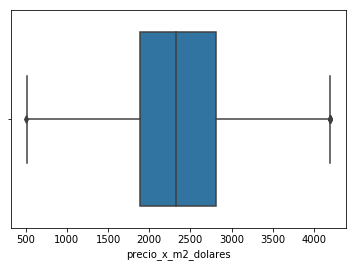

In [43]:
sns.boxplot(x=properatti_caba['precio_x_m2_dolares'])

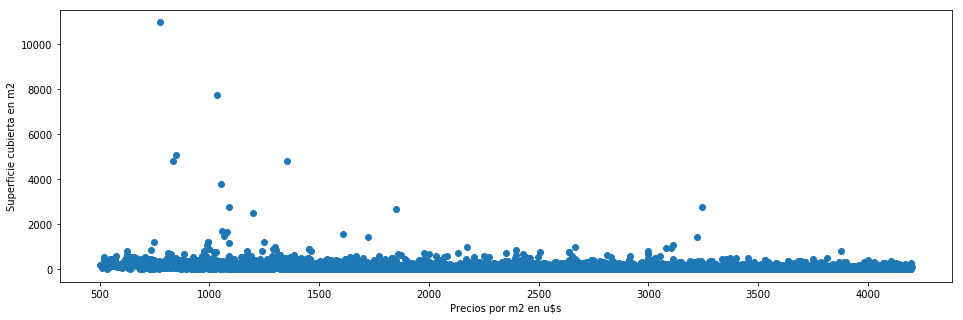

In [44]:
fig, ax = plt.subplots(figsize=(16,5))
ax.scatter(properatti_caba['precio_x_m2_dolares'], properatti_caba['superficie_cubierta'])
ax.set_xlabel('Precios por m2 en u$s')
ax.set_ylabel('Superficie cubierta en m2')
plt.show()

## Visualizamos el top 5 y el bottom 5 de precios por provincia y por barrio de CABA

## Primero vemos el top 5 y bottom 5 por barrio de CABA

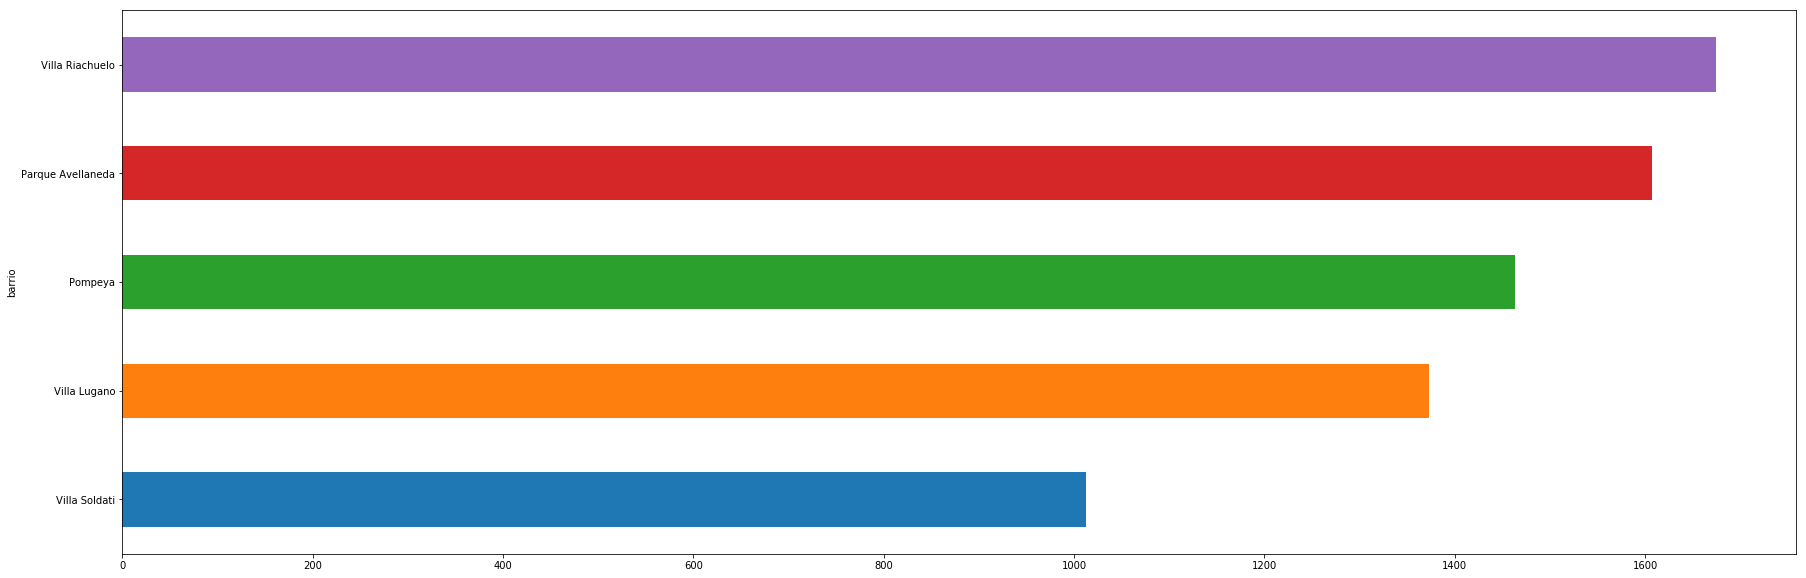

In [45]:
fig = plt.figure(figsize=(30,10))
properatti_caba.groupby('barrio',)['precio_x_m2'].mean().sort_values(ascending=True).head(5).plot(kind='barh')

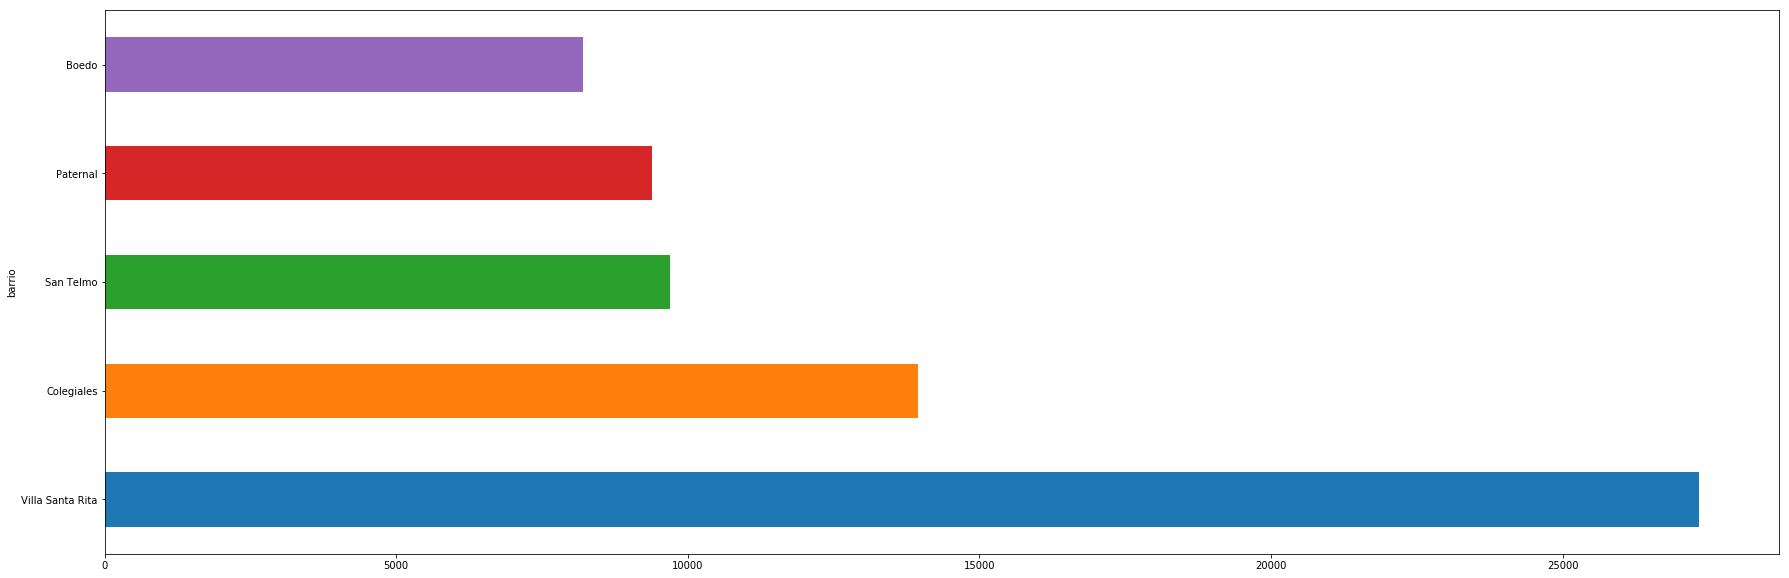

In [46]:
fig = plt.figure(figsize=(30,10))
properatti_caba.groupby('barrio',)['precio_x_m2'].mean().sort_values(ascending=False).head(5).plot(kind='barh')

## Vemos los valores por Provincias (sin los negocios)

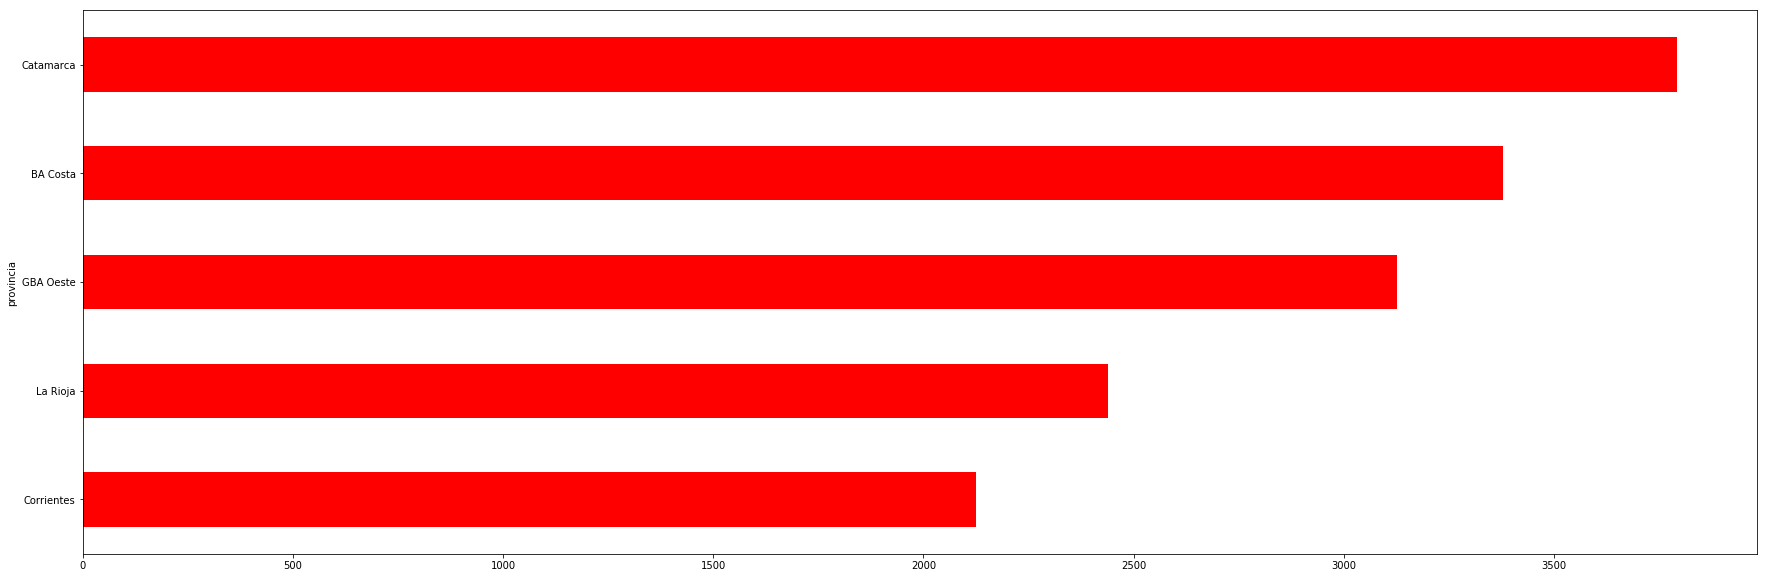

In [47]:
fig = plt.figure(figsize=(30,10))
properatti_pais_sin_store.groupby('provincia')['precio_x_m2'].mean().sort_values().head(5).plot(kind='barh', color='red')

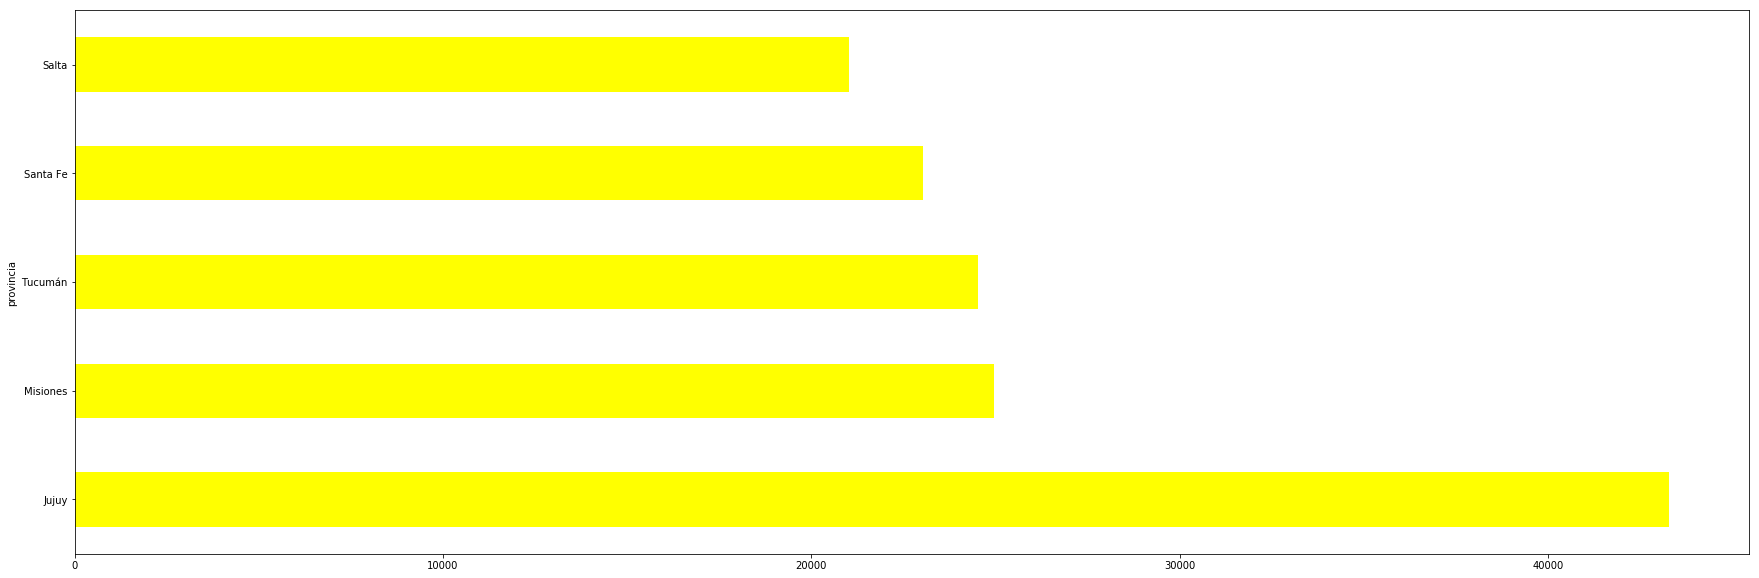

In [48]:
fig = plt.figure(figsize=(30,10))
properatti_pais_sin_store.groupby('provincia')['precio_x_m2'].mean().sort_values(ascending=False).head(5).plot(kind='barh', color='yellow')

# Georreferenciación

In [49]:
def from_wkt(df, wkt_column):
    
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(df, geometry='coordinates')
    return gdf

In [50]:
from shapely.geometry import Point

def from_x_y(df, x, y):
    gdf = geopandas.GeoDataFrame(df.drop([x, y], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

## Cargamos la información de los barrios, para ubicar las propiedades dentro de la CABA.

In [51]:
barrios = pd.read_csv("barrios.csv", encoding='latin1')

In [52]:
barrios = from_wkt(barrios, "WKT")

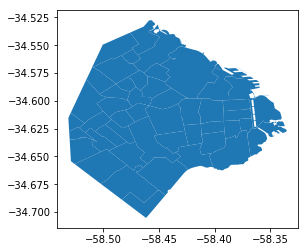

In [53]:
barrios.plot()

In [54]:
properatti_caba = from_x_y(properatti_caba, "LNG","LAT")

## Visualizamos distribución de departamentos en CABA

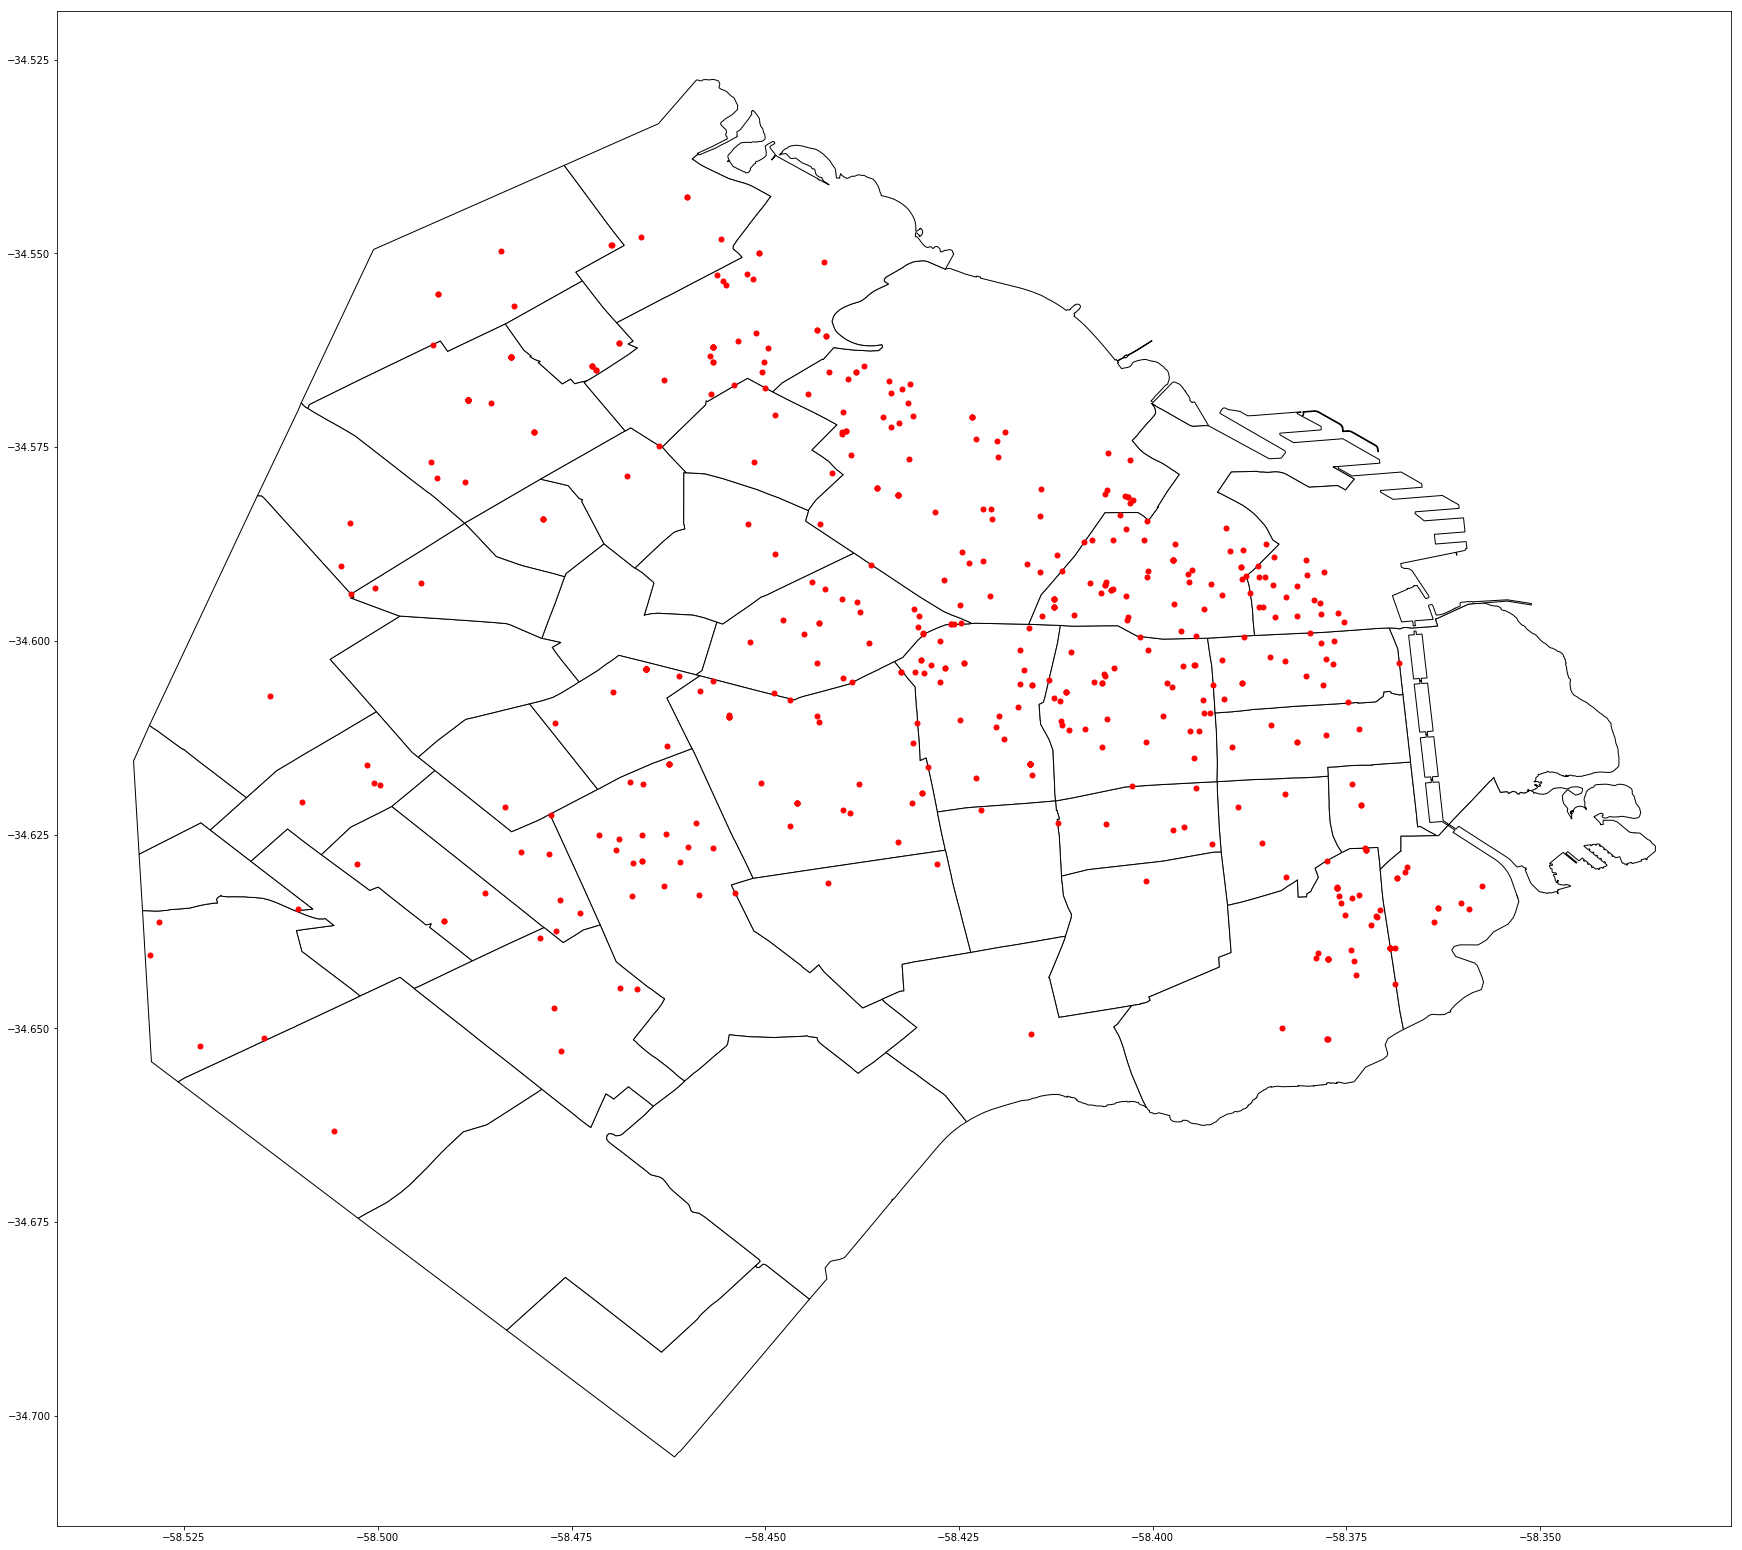

In [60]:
fig, ax = plt.subplots(figsize=[30,30])
ax.set_aspect('equal')
barrios.plot(ax=ax, color='white', edgecolor='black')
properatti_caba_apt.plot(ax=ax, marker='o', color='red', markersize=25)
plt.show();

## Visualizamos las de propiedades según el tipo de propiedad

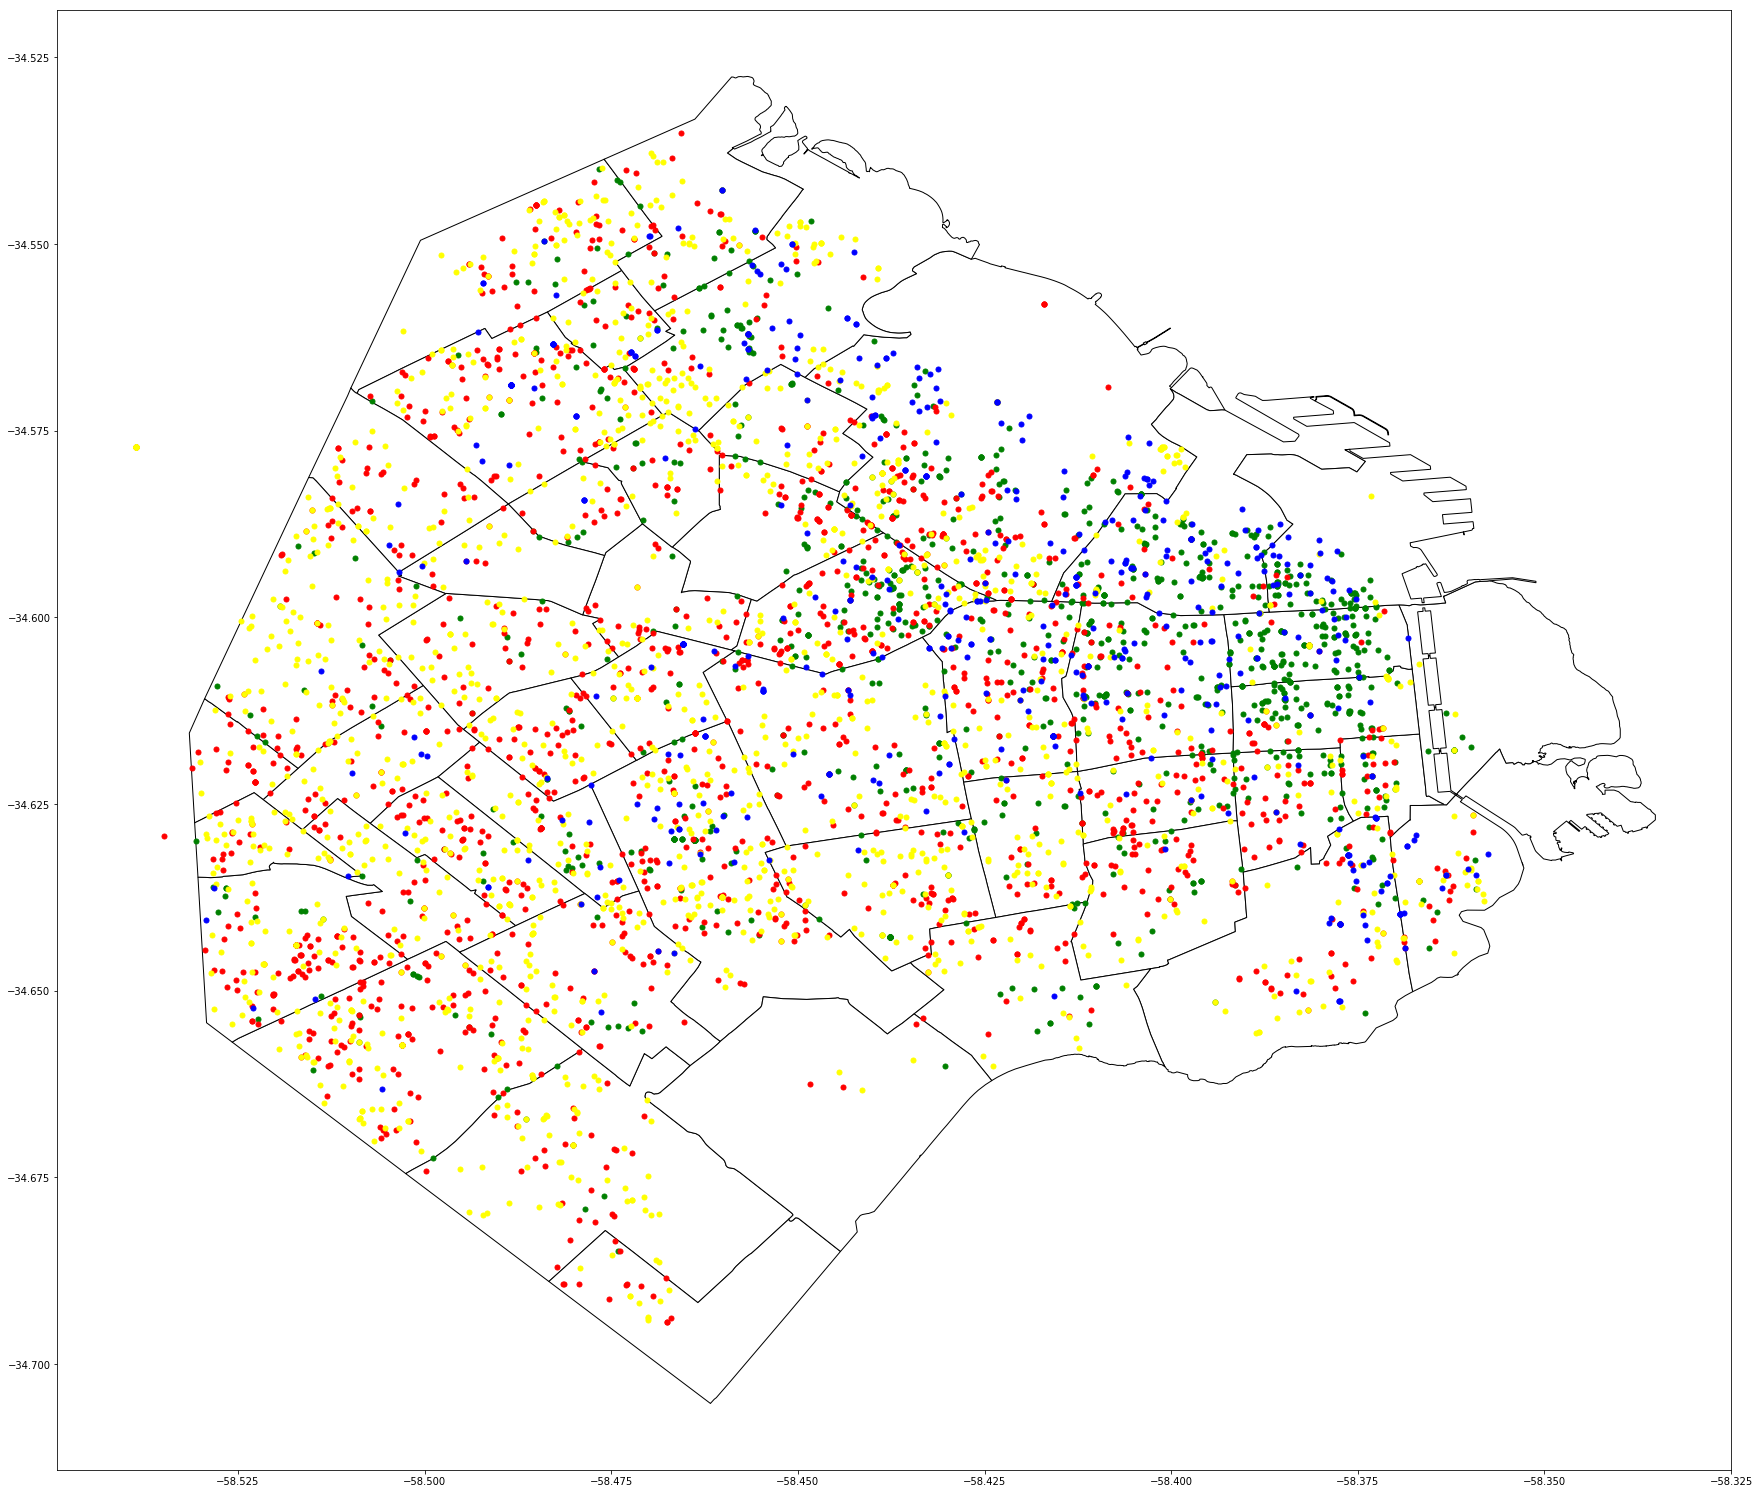

In [56]:
properatti_caba_stores = from_x_y(properatti_caba_stores, "LNG","LAT")
properatti_caba_PH = from_x_y(properatti_caba_PH, "LNG","LAT")
properatti_caba_house = from_x_y(properatti_caba_house, "LNG","LAT")
properatti_caba_apt = from_x_y(properatti_caba_apt, "LNG","LAT")

fig, ax = plt.subplots(figsize=[30,30])
ax.set_aspect('equal')
barrios.plot(ax=ax, color='white', edgecolor='black')
properatti_caba_stores.plot(ax=ax, marker='o', color='green', markersize=25)
properatti_caba_PH.plot(ax=ax, marker='o', color='red', markersize=25)
properatti_caba_house.plot(ax=ax, marker='o', color='yellow', markersize=25)
properatti_caba_apt.plot(ax=ax, marker='o', color='blue', markersize=25)
plt.show();

## Referenciamos algunas propiedades en el mapa de CABA con Folium

In [67]:
import folium

m = folium.Map([-34.606359, -58.443863], zoom_start=12, tiles="OpenStreetMap")

folium.GeoJson(barrios.to_json()).add_to(m)

#folium.GeoJson(bomberos.to_json()).add_to(m)
folium.GeoJson(properatti_caba_apt.head(70).to_json()).add_to(m)
m